In [1]:
%matplotlib notebook
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sqlalchemy


In [2]:
import psycopg2
from psycopg2 import Error
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "HW_Employee")
   
    cursor = connection.cursor()
   
    sql_query="SELECT b.title, AVG(a.salary) AS Average_Salary FROM salaries AS a INNER JOIN titles AS b ON a.emp_no=b.emp_no GROUP BY b.title"
   
    data = pd.read_sql(sql_query, connection)
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
data.head()

,title,average_salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


In [3]:
# Round the avg salary
data["average_salary"]=round(data["average_salary"],2)


In [4]:
# Displaying the titles and avg salaries
data

,title,average_salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


<IPython.core.display.Javascript object>


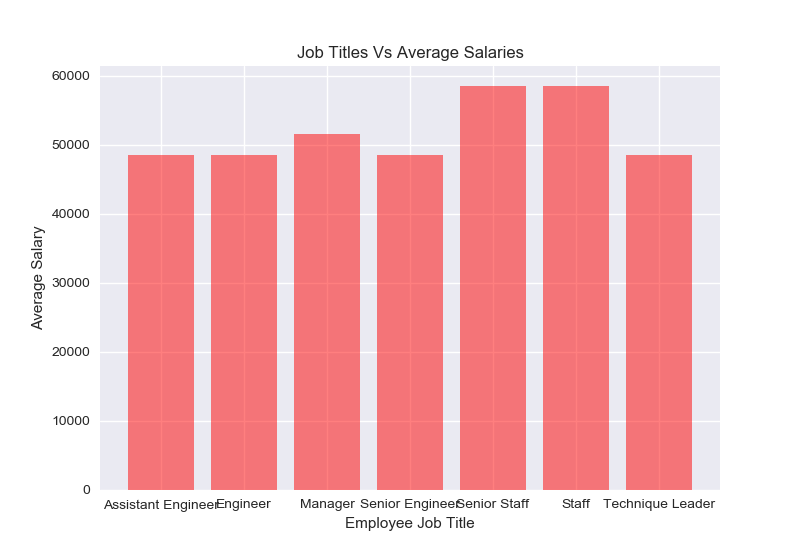

Text(0, 0.5, 'Average Salary')

In [5]:
#Plotting the above data

y_axis =data["average_salary"]
x_axis = data["title"]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

plt.title("Job Titles Vs Average Salaries")
plt.xlabel("Employee Job Title")
plt.ylabel("Average Salary")